In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


#### Caminho das pastas

In [154]:
caminho = r'C:\Users\leand\OneDrive\Área de Trabalho\Cursos\DNC\Ser Performance'
pasta = []
for pastas in os.listdir(caminho):
    pasta.append(pastas)

print(pasta)

['00D509DB-8BE0-4ACE-A5AD-5BF37386995B', '00D509DB-8BE0-4ACE-A5AD-5BF37386995B-20240718T184006Z-001.zip', '098887C7-B9E5-4BCC-8B68-D20E94CBC297', '147229CD-F3A5-4E75-91DC-7995C01F9438', '15EDFB01-20F8-451D-968C-3D76DA48FA5D', '2BB774CA-42B6-4958-AEAD-BE99DBE606CC', '3B4192CC-761D-45BA-A325-8D023FDC6D3A', '4903AA7A-ACE3-4C66-AD62-3FDBDD13CBF5', '4A74F755-039A-4777-834D-E9D7033E9142', '4C94CE12-1188-4B0C-9122-F2BDE5CB697A', '4F8F5521-B308-4503-89B9-9482D8B24351', '4FC32C34-7C03-4291-9325-6CA7055E7777', '4FF291F2-92A7-49AF-A40E-EB76D8F18F58', '5CD89290-B8DF-414F-9720-5891CD0BCFA5', '5F4387EC-6857-4E6E-94CC-C1CBE1E4F0B4', '6F67F229-B819-4508-891F-4573DB8F3CB2', '7257F457-ED17-4DD5-B738-0C8734A36101', '752351F6-AED0-43AB-B195-EC073589A8BA', '7672F3C1-00A6-42F2-A72C-8804C289CEC9', '79816F71-04C8-4B79-A572-757A0FE29B34', '8C0E7DB8-0B34-4451-B387-795F9B751589', '9DBC9CF3-7B21-410E-A27F-34589AAC3A20', 'A2687A1C-CA71-4245-8697-FE717B66DBF8', 'AB2282B0-7703-42B8-9F34-C06B4EC78790', 'ACE6D50E-AD7E

### usei o laço de repetição para buscar e já nomear as tabelas

In [155]:
cliente =  caminho + '\\' + pasta[0] + '\\'

for csv in os.listdir(cliente):
    if csv.endswith('.csv'):
        if 'acessos' in csv:
            acessos = pd.read_csv(cliente + csv)
        if 'campanha' in csv:
            campanha = pd.read_csv(cliente + csv)
        if 'feedback' in csv:
            feedback = pd.read_csv(cliente + csv)
        if 'produto' in csv:
            produto = pd.read_csv(cliente + csv)
        if 'treinamento' in csv:
            treinamento = pd.read_csv(cliente + csv)
        if 'vendas' in csv:
            vendas = pd.read_csv(cliente + csv)

In [175]:
acessos.head()


,Data,Funcionario,Unidade,Quantidade_de_Acessos,CLI_CODIGO
0,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,9,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-10,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-14,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-16,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-20,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,5,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


#### Acessos por Funcionário

In [178]:
funcacessos = acessos.groupby('Funcionario')['Quantidade_de_Acessos'].sum().sort_values(ascending=False)
funcacessos.head(10)

Funcionario
B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0    18522
4058BE4C-CD1A-40D3-89A6-76142B2BE39D    12584
DCFBB00A-4F15-45E3-83D0-B04E0292BB6E    10129
9D6A61EF-89BD-4AAD-9B83-5ECE41B49C4D     5236
5822DC47-B851-42C3-BDE0-BC9ABAFFBC57     3641
4716A6E5-20E3-42F0-81C6-CCD88070E648     3495
46AAF177-3F15-4CAB-BF67-27DBE9CC6748     2577
29CE7071-A7F0-4FCC-8348-E8F3A19FB381     2576
0EA7A9D3-8569-4082-AA86-9346CF60A095     2399
AC5D28E1-3B90-4D0D-870A-52E3C156AC64     2111
Name: Quantidade_de_Acessos, dtype: int64

#### Acessos por Unidade

In [179]:
unidade = acessos.groupby('Unidade')['Quantidade_de_Acessos'].sum().sort_values(ascending=False)
unidade.head(10)

Unidade
2F775CDD-74A9-4516-B2A4-6D7E643E96EA    25469
FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6    22365
6CAD2F0B-5D9B-4C84-BEAD-D63EFEAB244B    20948
1E3AB2C8-DDB6-4981-AC30-EFFAD5F4DFAC     6142
01CB393F-3FA5-4CFF-95CB-278FC01C9EC6     1934
Name: Quantidade_de_Acessos, dtype: int64

In [159]:
vendas.shape

(10719, 9)

In [160]:
vendas.head()

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.0,0.0,165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.0,0.0,915.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.0,116.8,1343.2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.0,685.0,6165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.0,511.0,6356.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


#### Criei a coluna devoluções

In [161]:
vendas['Devolucoes'] = vendas.apply(lambda row: 'S' if pd.isna(row['N_Produtos']) or row['N_Produtos'] <= 0 else 'N', axis=1)


### Ticket médio

In [162]:
tcktmedio = vendas['Vlr_Bruto'].sum() / vendas.shape[0]
print(f'Ticket médio: {tcktmedio:.2f}')

Ticket médio: 10124.14


### Faturamento sem descontos

In [163]:
FatBruto = vendas['Vlr_Bruto'].sum()
print(f'Faturamento bruto:  {FatBruto:.2f}')

Faturamento bruto:  108520678.86


### Faturamento com descontos

In [164]:
fatliq = vendas['Vlr_Liquido'].sum()
print(f'Faturamento líquido:  {fatliq:.2f}')

Faturamento líquido:  101700863.59


### Total de Descontos

In [165]:
total_descontos = vendas['Vlr_Desconto'].sum()
print(f'Total de descontos:  {total_descontos:.2f}')

Total de descontos:  5287770.73


#### Total de produtos vendidos

In [166]:
totprod = vendas['N_Produtos'].sum()
print(f'Total de produtos:  {totprod:.0f} unidades')

Total de produtos:  175116 unidades


#### Top 10 Funcionários que mais venderam

In [167]:
func_rank = vendas['Funcionario'].value_counts()
top10func = func_rank.head(10)
top10func

Funcionario
B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0    1281
5822DC47-B851-42C3-BDE0-BC9ABAFFBC57     901
0EA7A9D3-8569-4082-AA86-9346CF60A095     862
46AAF177-3F15-4CAB-BF67-27DBE9CC6748     809
24985D0E-9EDF-443D-BF33-CE5CD150100B     778
21A46DC1-490D-4077-9038-8BF460B71751     740
6E478F40-59BE-4210-BFD7-E8F236A02724     568
AC5D28E1-3B90-4D0D-870A-52E3C156AC64     536
4716A6E5-20E3-42F0-81C6-CCD88070E648     529
E6C62F5A-21C7-4F83-B6A2-83A03B208343     512
Name: count, dtype: int64

#### Funcionários que menos venderam

In [168]:
tail10func = func_rank.tail(10)
tail10func

Funcionario
F69F7D87-4788-40F3-890B-997300670DAA    27
4058BE4C-CD1A-40D3-89A6-76142B2BE39D    18
56D190B4-86F4-404B-B94F-6B57C54EB2D0    16
DC582867-D718-46E5-8036-1C0317044475    13
75CAA7DE-1065-48CD-9EFF-4C1AAFE4CF29    11
D28853F4-40DB-45A7-99E9-52E5FAD1C3B1     9
2F01257F-2824-40E1-BF56-1B1813D81792     7
9248F096-EC8F-4948-AD93-D30C3DBE701F     4
76F47389-5FC9-4D79-9C4E-EEEF9FAF10BE     2
1A2B6CA2-1951-4D41-A175-85C8E8312564     1
Name: count, dtype: int64

#### Devoluções

In [169]:
devolucao = vendas['Devolucoes'].value_counts()
devolucao

Devolucoes
N    10346
S      373
Name: count, dtype: int64

#### Total de funcionários desse cliente

In [170]:
total_funcionarios = len(vendas['Funcionario'].unique())
print(f'Nessa unidade temos:  {total_funcionarios} funcionários')

Nessa unidade temos:  40 funcionários


In [182]:
funcionarios_devoluçoes = vendas.groupby('Funcionario')['Devolucoes'].value_counts().reset_index()
funcionarios_devolucoes = funcionarios_devoluçoes.sort_values(by='count', ascending=False)

funcionarios_dev_S = funcionarios_devolucoes[funcionarios_devolucoes['Devolucoes'] == 'S']	

top10func_dev_x_fat = funcionarios_dev_S.head(10)


### (Top 10)  Funcionário que tiveram Devolução

In [183]:
contagem = top10func_dev_x_fat.groupby('count')

In [184]:
contagem.head(10)

,Funcionario,Devolucoes,count
3,0EA7A9D3-8569-4082-AA86-9346CF60A095,S,33
60,AC5D28E1-3B90-4D0D-870A-52E3C156AC64,S,31
24,46AAF177-3F15-4CAB-BF67-27DBE9CC6748,S,25
26,4716A6E5-20E3-42F0-81C6-CCD88070E648,S,25
49,913BBDB4-F391-46FC-A805-96809536B1F4,S,24
38,6E478F40-59BE-4210-BFD7-E8F236A02724,S,21
36,5822DC47-B851-42C3-BDE0-BC9ABAFFBC57,S,21
72,E6C62F5A-21C7-4F83-B6A2-83A03B208343,S,19
16,24985D0E-9EDF-443D-BF33-CE5CD150100B,S,18
56,A3C61F2F-F4AE-4823-ADD4-B566315C7467,S,17


### Faturamento dos 10 Funcionários que mais tiveram devolução

In [192]:
for fat_p_func in top10func_dev_x_fat['Funcionario']:
    fat_func = vendas[vendas['Funcionario'] == fat_p_func]['Vlr_Liquido'].sum()
    top10func_dev_x_fat['Faturamento_Liquido'] = top10func_dev_x_fat['Funcionario'].apply(
    lambda x: vendas[vendas['Funcionario'] == x]['Vlr_Liquido'].sum()
)
    print(f'Faturamento líquido do funcionário {fat_p_func}:  {fat_func:.2f}')

Faturamento líquido do funcionário 0EA7A9D3-8569-4082-AA86-9346CF60A095:  6440970.96
Faturamento líquido do funcionário AC5D28E1-3B90-4D0D-870A-52E3C156AC64:  3390391.16
Faturamento líquido do funcionário 46AAF177-3F15-4CAB-BF67-27DBE9CC6748:  5855467.40
Faturamento líquido do funcionário 4716A6E5-20E3-42F0-81C6-CCD88070E648:  4888718.20
Faturamento líquido do funcionário 913BBDB4-F391-46FC-A805-96809536B1F4:  1376148.15
Faturamento líquido do funcionário 6E478F40-59BE-4210-BFD7-E8F236A02724:  5025550.60
Faturamento líquido do funcionário 5822DC47-B851-42C3-BDE0-BC9ABAFFBC57:  6693175.44
Faturamento líquido do funcionário E6C62F5A-21C7-4F83-B6A2-83A03B208343:  3040675.69
Faturamento líquido do funcionário 24985D0E-9EDF-443D-BF33-CE5CD150100B:  5222761.04
Faturamento líquido do funcionário A3C61F2F-F4AE-4823-ADD4-B566315C7467:  2156454.07


C:\Users\leand\AppData\Local\Temp\ipykernel_20732\2738498737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10func_dev_x_fat['Faturamento_Liquido'] = top10func_dev_x_fat['Funcionario'].apply(


In [193]:
top10func_dev_x_fat

,Funcionario,Devolucoes,count,Faturamento_Liquido
3,0EA7A9D3-8569-4082-AA86-9346CF60A095,S,33,6440970.96
60,AC5D28E1-3B90-4D0D-870A-52E3C156AC64,S,31,3390391.16
24,46AAF177-3F15-4CAB-BF67-27DBE9CC6748,S,25,5855467.40
26,4716A6E5-20E3-42F0-81C6-CCD88070E648,S,25,4888718.20
49,913BBDB4-F391-46FC-A805-96809536B1F4,S,24,1376148.15
38,6E478F40-59BE-4210-BFD7-E8F236A02724,S,21,5025550.60
36,5822DC47-B851-42C3-BDE0-BC9ABAFFBC57,S,21,6693175.44
72,E6C62F5A-21C7-4F83-B6A2-83A03B208343,S,19,3040675.69
16,24985D0E-9EDF-443D-BF33-CE5CD150100B,S,18,5222761.04
56,A3C61F2F-F4AE-4823-ADD4-B566315C7467,S,17,2156454.07


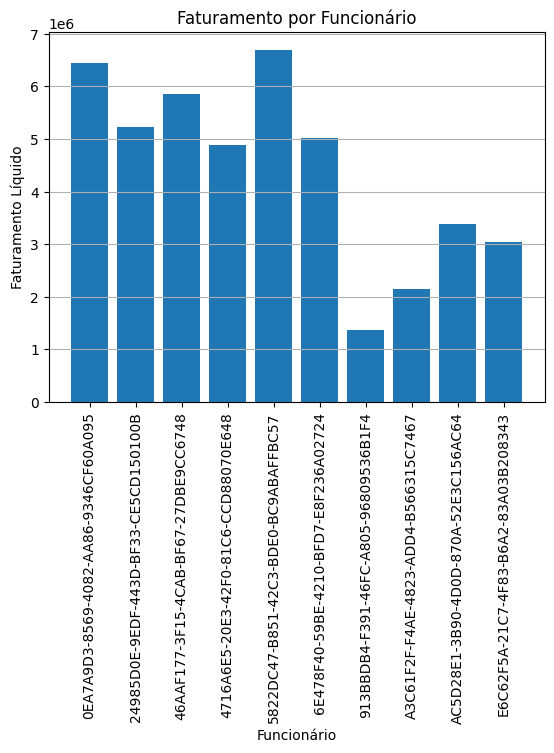

In [202]:
grouped_data = top10func_dev_x_fat.groupby('Funcionario')['Faturamento_Liquido'].sum().reset_index()

# Criando as barras
plt.bar(grouped_data['Funcionario'], grouped_data['Faturamento_Liquido']) 
plt.xticks(rotation=90)

plt.xlabel('Funcionário')
plt.ylabel('Faturamento Líquido')
plt.title('Faturamento por Funcionário')
plt.grid(axis='y')

plt.show()

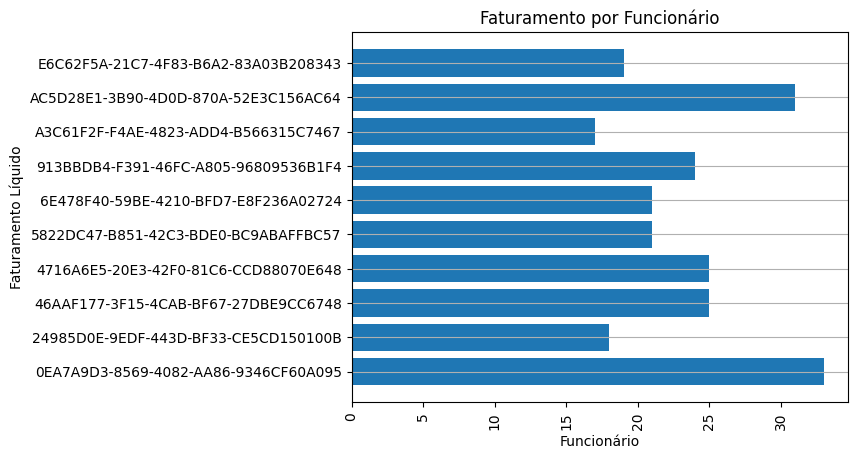

In [220]:
grouped_data = top10func_dev_x_fat.groupby('Funcionario')['count'].sum().reset_index()

# Criando as barras
plt.barh(grouped_data['Funcionario'], grouped_data['count']) 
plt.xticks(rotation=90)

plt.xlabel('Funcionário')
plt.ylabel('Faturamento Líquido')
plt.title('Faturamento por Funcionário')
plt.grid(axis='y')

plt.show()